<a href="https://colab.research.google.com/github/siaSim/keras_deeplearning/blob/main/5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

원본 모델

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import numpy as np
(train_data,train_labels),_ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
train_data =vectorize_sequences(train_data)
model = keras.Sequential([
    layers.Dense(16,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1,activation="sigmoid")
  ])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original =model.fit(train_data,train_labels,
                            epochs=20,batch_size=512,validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 4s 68ms/step - loss: 0.5549 - accuracy: 0.7711 - val_loss: 0.4460 - val_accuracy: 0.8617
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3666 - accuracy: 0.8889 - val_loss: 0.3475 - val_accuracy: 0.8782
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2739 - accuracy: 0.9141 - val_loss: 0.2963 - val_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2202 - accuracy: 0.9309 - val_loss: 0.2799 - val_accuracy: 0.8908
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1862 - accuracy: 0.9395 - val_loss: 0.2750 - val_accuracy: 0.8925
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1584 - accuracy: 0.9506 - val_loss: 0.2812 - val_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1367 - accurac

작은 용량의 모델

In [2]:
model = keras.Sequential([
    layers.Dense(4,activation="relu"),
    layers.Dense(4,activation="relu"),
    layers.Dense(1,activation="sigmoid")])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model =model.fit(
    train_data, train_labels,
    epochs=20,batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 63ms/step - loss: 0.6524 - accuracy: 0.6125 - val_loss: 0.6158 - val_accuracy: 0.7057
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5854 - accuracy: 0.7355 - val_loss: 0.5703 - val_accuracy: 0.7683
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5395 - accuracy: 0.7975 - val_loss: 0.5345 - val_accuracy: 0.8081
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4993 - accuracy: 0.8412 - val_loss: 0.5053 - val_accuracy: 0.8179
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.4628 - accuracy: 0.8723 - val_loss: 0.4836 - val_accuracy: 0.8691
Epoch 6/20
30/30 [==============================] - 2s 54ms/step - loss: 0.4347 - accuracy: 0.8965 - val_loss: 0.4686 - val_accuracy: 0.8681
Epoch 7/20
30/30 [==============================] - 2s 55ms/step - loss: 0.4118 - accuracy: 0.9121 - val_loss: 0.4578 - val_accuracy: 0.8799
Epoch 8/20
30

큰 용량의 모델

In [3]:
model = keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(512,activation="relu"),
    layers.Dense(1,activation="sigmoid")])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model =model.fit(
    train_data, train_labels,
    epochs=20,batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 11s 350ms/step - loss: 0.5607 - accuracy: 0.7237 - val_loss: 0.5376 - val_accuracy: 0.7463
Epoch 2/20
30/30 [==============================] - 10s 333ms/step - loss: 0.3165 - accuracy: 0.8664 - val_loss: 0.2820 - val_accuracy: 0.8841
Epoch 3/20
30/30 [==============================] - 14s 489ms/step - loss: 0.2441 - accuracy: 0.9039 - val_loss: 0.2704 - val_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 11s 378ms/step - loss: 0.1924 - accuracy: 0.9257 - val_loss: 0.2872 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 12s 403ms/step - loss: 0.1353 - accuracy: 0.9487 - val_loss: 0.3632 - val_accuracy: 0.8732
Epoch 6/20
30/30 [==============================] - 9s 316ms/step - loss: 0.1158 - accuracy: 0.9637 - val_loss: 0.3222 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 11s 377ms/step - loss: 0.0817 - accuracy: 0.9741 - val_loss: 0.3584 - val_accuracy: 0.8853


모델에 L2 가중치 추가하기

In [4]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),activation="relu"),
    layers.Dense(1,activation="sigmoid")])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",metrics=["accuracy"])
history_l2_reg =model.fit(
    train_data, train_labels,
    epochs=20,batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 62ms/step - loss: 0.6154 - accuracy: 0.7834 - val_loss: 0.4903 - val_accuracy: 0.8551
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4143 - accuracy: 0.8898 - val_loss: 0.4049 - val_accuracy: 0.8748
Epoch 3/20
30/30 [==============================] - 1s 48ms/step - loss: 0.3370 - accuracy: 0.9103 - val_loss: 0.3625 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 2s 55ms/step - loss: 0.2946 - accuracy: 0.9249 - val_loss: 0.3706 - val_accuracy: 0.8764
Epoch 5/20
30/30 [==============================] - 2s 55ms/step - loss: 0.2706 - accuracy: 0.9343 - val_loss: 0.3506 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2565 - accuracy: 0.9375 - val_loss: 0.3598 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2390 - accuracy: 0.9467 - val_loss: 0.3685 - val_accuracy: 0.8813
Epoch 8/20
30

케라스에서 사용할 수 있는 가중치 규제

In [5]:
from tensorflow.keras import regularizers

regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001,l2=0.001)

IMDB 모델에 드롭아웃 추가하기

In [6]:
model = keras.Sequential([
    layers.Dense(16,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1,activation="sigmoid")])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout =model.fit(
    train_data, train_labels,
    epochs=20,batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.6442 - accuracy: 0.6253 - val_loss: 0.5535 - val_accuracy: 0.8455
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5273 - accuracy: 0.7573 - val_loss: 0.4449 - val_accuracy: 0.8692
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4397 - accuracy: 0.8157 - val_loss: 0.3552 - val_accuracy: 0.8789
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3817 - accuracy: 0.8503 - val_loss: 0.3193 - val_accuracy: 0.8846
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3386 - accuracy: 0.8749 - val_loss: 0.3040 - val_accuracy: 0.8801
Epoch 6/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2950 - accuracy: 0.8925 - val_loss: 0.2796 - val_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2622 - accuracy: 0.9069 - val_loss: 0.2728 - val_accuracy: 0.8910
Epoch 8/20
30

결과 그래프 그리기

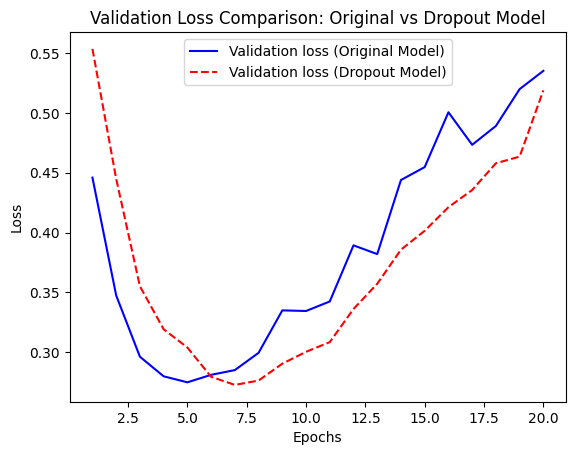

In [7]:
import matplotlib.pyplot as plt

epochs = range(1, 21)

plt.plot(epochs, history_original.history['val_loss'], 'b-', label='Validation loss (Original Model)')
plt.plot(epochs, history_dropout.history['val_loss'], 'r--', label='Validation loss (Dropout Model)')
plt.title('Validation Loss Comparison: Original vs Dropout Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()